In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, f1_score, plot_roc_curve, plot_precision_recall_curve, precision_recall_curve, roc_curve, auc


In [2]:
#1. Load dataset

wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


In [3]:
#2. Featurre Engineering

wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True) #impute
wine['label'] = np.where(wine['quality']>6, 1, 0) #buat kolom baru
wine['label'].value_counts(normalize=True)*100 #valuecount

0    81.153846
1    18.846154
Name: label, dtype: float64

__NOTES:__
<br> We will be doing some EDA to check the target variabel distribution. The target variabel distribution is
1. (+) a good quality wine : quality > 6 (18.9%)
1. (-) a bad quality wine : quality <= 6 (81.1%)

You will find that __the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class.__ The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

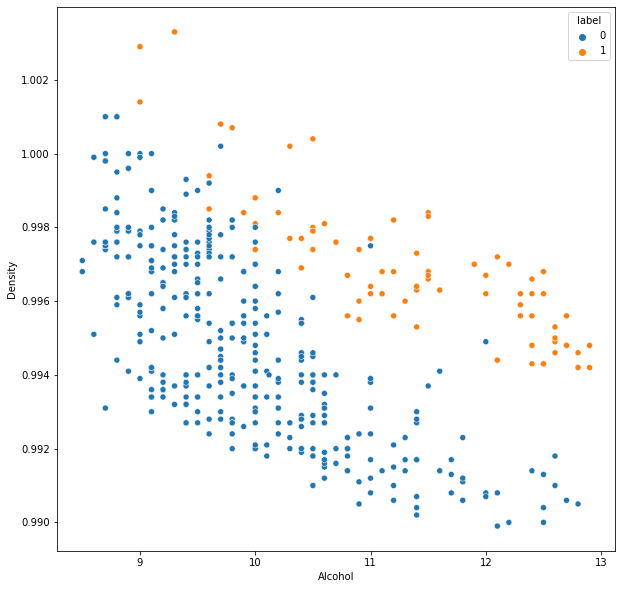

In [4]:
#3. Visualisasikan dalam plot

plt.figure(figsize=(10,10))
sns.scatterplot(x = 'alcohol', y = 'density', data=wine, hue='label')
plt.xlabel('Alcohol')
plt.ylabel('Density')

plt.show()

In [5]:
#4. Menentukan variabel dependen dan independen

X = wine[['density', 'alcohol']]
y = wine['label']

In [6]:
#5. Melakukan data splitting

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)

## __Model 1: w/o Polynomial__

In [7]:
#1. Melakukan pemodelan

logit = LogisticRegression() #benchmark
logit.fit(X_train, y_train)

LogisticRegression()

In [8]:
#2. Melakukan prediksi

y_pred = logit.predict(X_test)

In [9]:
#3. Membuat classification report

print('performance \n', classification_report(y_test, y_pred))

performance 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



__SUMARRY:__
<br> From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
1. precision (+) : 0.69
1. recall (+) : 0.38
1. f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

## Model 2: w/ Polynomial

In [10]:
#1. Melakukan polynomial

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X_train)
Xtr_poly = poly.transform(X_train)
Xts_poly = poly.transform(X_test)

In [11]:
#2. Melakukan model fitting

logit = LogisticRegression()
logit.fit(Xtr_poly, y_train)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
#3. Melakukan prediksi

y_pred = logit.predict(Xts_poly)

In [13]:
#4. Membuat classification report

print('performance \n', classification_report(y_test, y_pred))

performance 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



__SUMMARY:__
<br> From illustration abovel, you can see the performance improvement of the machine learning model. The changes of the three metrics:
1. precision (+) : from 0.69 to 0.95
1. recall (+) : from 0.38 to 0.88
1. f1-score (+) : from 0.49 to 0.91

# __Resampling Method__

__Non Performing Loan Case__

In [14]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [15]:
#1. load dataset

bankloan = pd.read_csv('bankloan.csv')
bankloan.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [16]:
#2. Menentukan variabel dependen dan independen

fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

X = bankloan[fitur]
y = bankloan[target]

In [17]:
#Melihat data apakh balanced atau tidak

bankloan['default'].value_counts(normalize=True)*100
#imbalanced

0    73.857143
1    26.142857
Name: default, dtype: float64

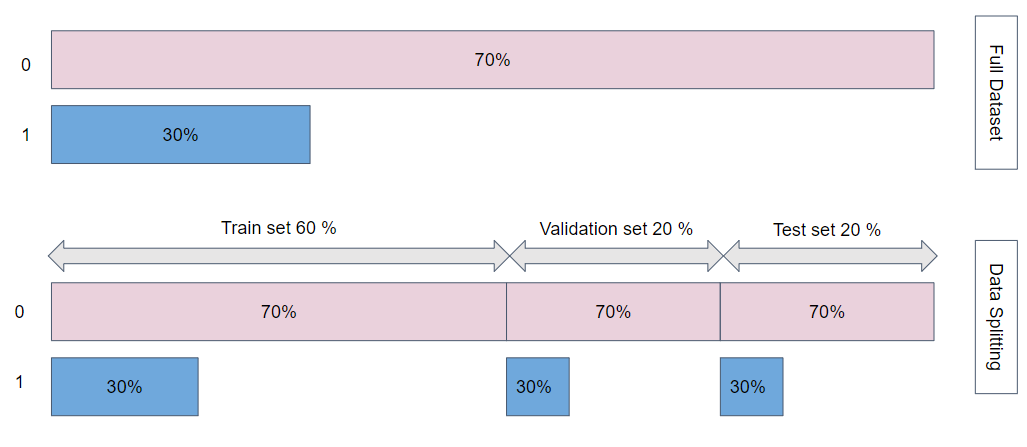

In [18]:
#2. Data splitting


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, test_size=.2, random_state=1899)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, stratify=y_train_val, test_size=.2, random_state=1899)

<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

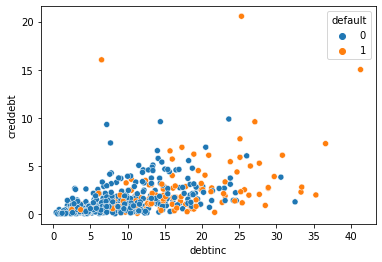

In [19]:
#Memvisualisasikan data dalam scatter plot

df = pd.concat([X_train_val,y_train_val], axis=1)

sns.scatterplot(x='debtinc', y='creddebt', data=df, hue='default')

SCENARIO:
<br> In the modeling process we will try some method and choose the best method based on f1 score. Those methods are :
1. logistic regression without any treatment
1. logistic regression that optimized by the threshold
1. logistic regression with random undersampling
1. Penalized logistic regression

> ### __1. Logistic regression without any treatment__

1. metrics : f1-score
1. benchmark
1. threshold optimization

In [20]:
#3. Melakukan model fitting dengan benchmark

logit = LogisticRegression()
logit.fit(X_train_val, y_train_val)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [21]:
#4. Melakukan prediksi 

y_pred = logit.predict(X_test)

In [22]:
#5. Membuat classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       103
           1       0.68      0.41      0.51        37

    accuracy                           0.79       140
   macro avg       0.75      0.67      0.69       140
weighted avg       0.78      0.79      0.77       140



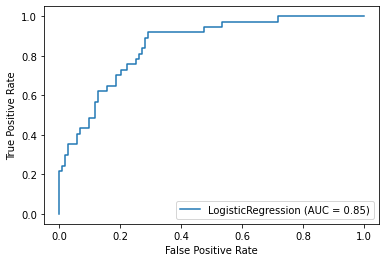

In [23]:
#6. Membuat roc crve

plot_roc_curve(logit, X_test, y_test)
#nilai auc 0.85 == sudah cukup bagus (semakin dekat1, semakin bagus)

> ### __2. Logistic regression that optimized by the threshold__

In [24]:
#Untuk mendapatkan nilai threshold dari roc curve

prob1 = logit.predict_proba(X_test)[:,1]

fpr, tpr, threshold = roc_curve(y_test, prob1)

In [25]:
#7. Melakukan modeling dengan menaikkan threshold

logit.fit(X_train, y_train)

thr_value = [i/100 for i in range(20, 60)]
score = 0
score_list = []

for i in thr_value:
    y_prob = logit.predict_proba(X_val)[:,1]
    y_pred = np.where(y_prob>i,1,0)
    score_temp = f1_score(y_val, y_pred)
    score_list.append(score_temp)
    
    if score_temp > score:
        score = score_temp
        
        best_score = score
        best_thr = i

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

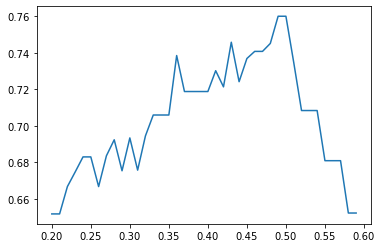

In [26]:
#Membuat plot hasil thr dan score

sns.lineplot(thr_value, score_list)

In [27]:
#Mencari nilai best threshold dan best score

print('best threshold', best_thr)
print('best score', best_score)

best threshold 0.49
best score 0.7599999999999999


In [28]:
#Melakukan model

logit.fit(X_train_val, y_train_val)
y_prob = logit.predict_proba(X_test)[:,1] #memprediksi target
y_pred = np.where(y_prob>best_thr, 1, 0)

C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [29]:
#Membuat classification report

print(classification_report(y_test, y_pred))
#nilai f1 score naik sedikit

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       103
           1       0.67      0.43      0.52        37

    accuracy                           0.79       140
   macro avg       0.74      0.68      0.70       140
weighted avg       0.78      0.79      0.78       140



> ### __3. Logistic regression with random undersampling__

__RANDOM UNDER SAMPLER__

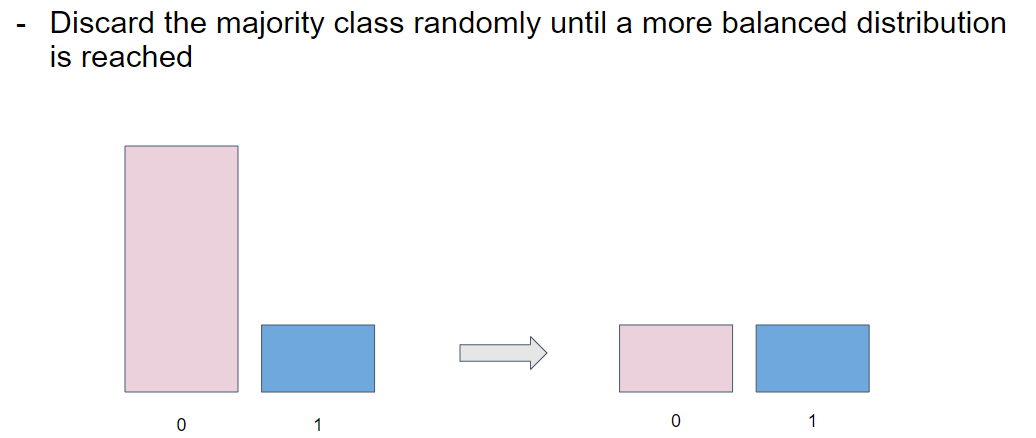

In [30]:
#1. Melakukan random sampling dengan under sampling

rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train_val, y_train_val) # undersampling the training set

In [31]:
#mengecek jumlah data y awal

y_train_val['default'].value_counts()

0    414
1    146
Name: default, dtype: int64

In [32]:
#mengecek jumlah data y setelah random undersampling

y_under['default'].value_counts()
#sudah sama

1    146
0    146
Name: default, dtype: int64

In [33]:
#2. Melakukan modeling, prediksi dan membuat classification report

logit_under = LogisticRegression()
logit_under.fit(X_under, y_under)
y_pred = logit_under.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.68      0.79       103
           1       0.50      0.89      0.64        37

    accuracy                           0.74       140
   macro avg       0.72      0.79      0.72       140
weighted avg       0.83      0.74      0.75       140



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


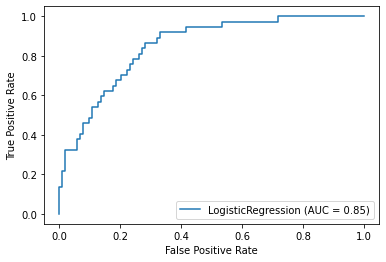

In [34]:
#3. Membuat roc curve

plot_roc_curve(logit_under, X_test, y_test)

<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

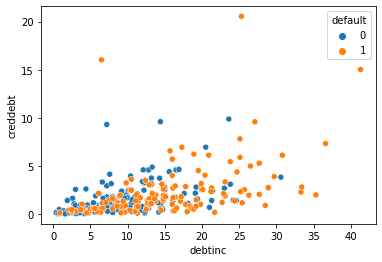

In [35]:
#Memvisualisasikan data dalam scatter plot

under_df = pd.concat([X_under, y_under], axis=1)

sns.scatterplot(x='debtinc', y='creddebt', data=under_df, hue='default')

__SMOTE__

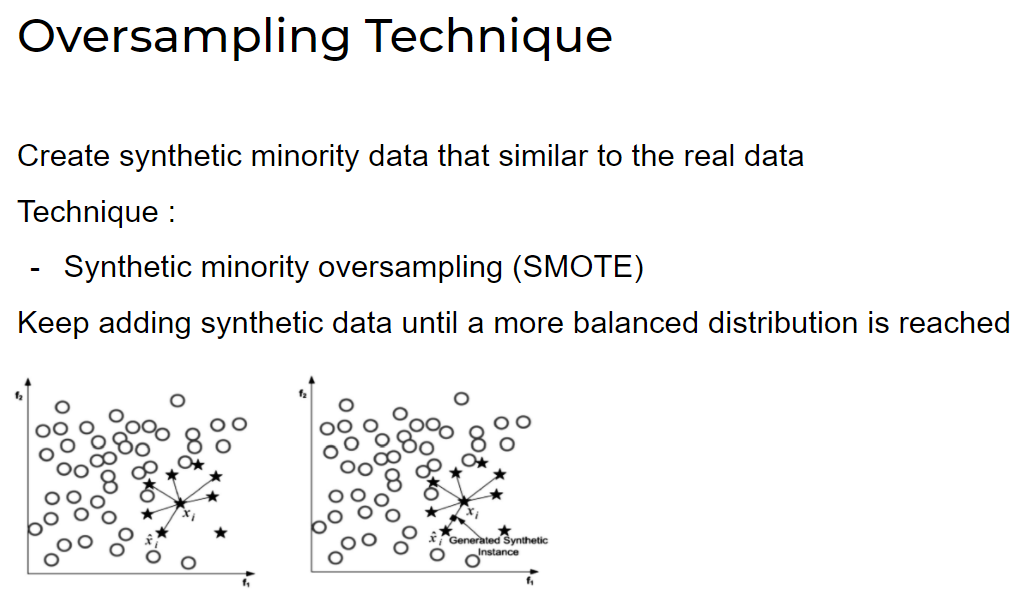

In [36]:
#1. Melakukan random sampling dengan smote

smote = SMOTE()
X_smo, y_smo = smote.fit_resample(X_train_val, y_train_val)

In [37]:
#2. Melakukan modeling, prediksi dan membuat classification report

logit_smo = LogisticRegression().fit(X_smo, y_smo)
y_pred = logit_smo.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81       103
           1       0.52      0.86      0.65        37

    accuracy                           0.75       140
   macro avg       0.73      0.79      0.73       140
weighted avg       0.82      0.75      0.76       140



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

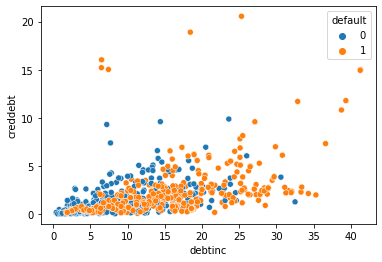

In [38]:
#Memvisualisasikan data dalam scatter plot

smo_df = pd.concat([X_smo, y_smo], axis=1)

sns.scatterplot(x='debtinc', y='creddebt', data=smo_df, hue='default')

__RANDOM OVER SAMPLE__

In [39]:
#1. Melakukan random sampling dengan over sampling

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train_val, y_train_val)

In [40]:
#2. Melakukan modeling, prediksi dan membuat classification report

logit_ros = LogisticRegression().fit(X_ros, y_ros)
y_pred = logit_ros.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.71      0.82       103
           1       0.53      0.92      0.67        37

    accuracy                           0.76       140
   macro avg       0.75      0.81      0.74       140
weighted avg       0.85      0.76      0.78       140



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<AxesSubplot:xlabel='debtinc', ylabel='creddebt'>

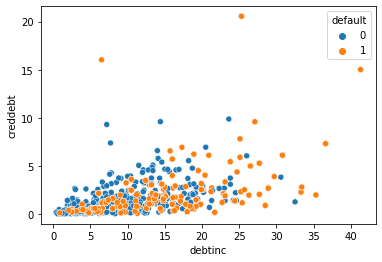

In [41]:
#Memvisualisasikan data dalam scatter plot

ros_df = pd.concat([X_ros, y_ros], axis=1)

sns.scatterplot(x='debtinc', y='creddebt', data=ros_df, hue='default')

> ### __4. Penalized logistic regression__

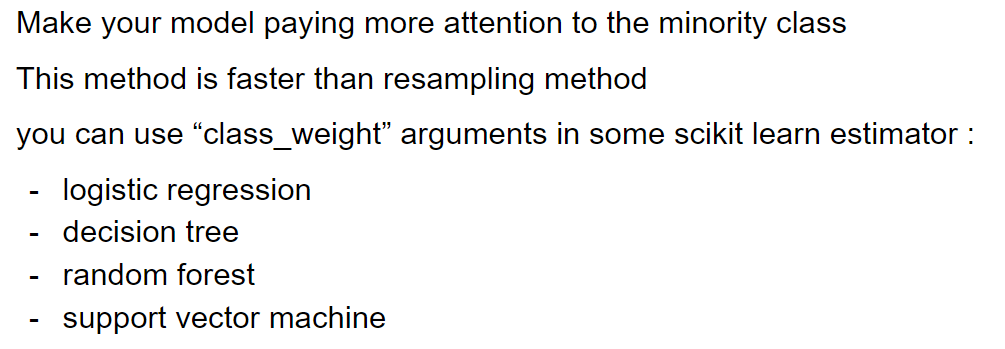

In [42]:
#1. Melakukan penalized logreg

logit_balance = LogisticRegression(class_weight = 'balanced')
logit_balance.fit(X_train_val, y_train_val)

              precision    recall  f1-score   support

           0       0.95      0.72      0.82       103
           1       0.53      0.89      0.67        37

    accuracy                           0.76       140
   macro avg       0.74      0.81      0.74       140
weighted avg       0.84      0.76      0.78       140



C:\Users\asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
#2. Melakukan prediksi dan membuat classification report

y_pred = logit_balance.predict(X_test)
print(classification_report(y_test, y_pred))

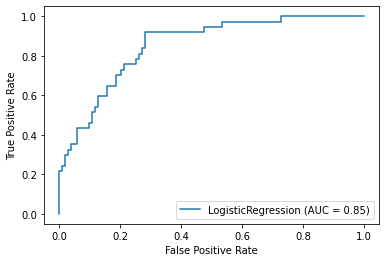

In [43]:
#3. Membuat plot roc curve

plot_roc_curve(logit_balance, X_test, y_test)

> ### __5. SUMMARY__

In [44]:
#1. Membuat data untuk perbandingan

#F1 benchmark
f1_no_treat = f1_score(y_test, logit.predict(X_test))

#F1 Threshold
y_prob1 = logit.predict_proba(X_test)[:,1]
f1_no_treat_thr = f1_score(y_test, np.where(y_prob1>best_thr,1,0))

#F1 under sampling
f1_under = f1_score(y_test, logit_under.predict(X_test))

#F1 random over sampling
f1_ros = f1_score(y_test, logit_ros.predict(X_test))

#F1 Smote
f1_smo = f1_score(y_test, logit_smo.predict(X_test))

#F1 Penalized
f1_balance = f1_score(y_test, logit_balance.predict(X_test))

In [45]:
#2. Membuat dataframe perbandingan nilai F1 Score

score_list = [f1_no_treat, f1_no_treat_thr, f1_under, f1_ros, f1_smo, f1_balance]
model_name = 'default threshold_opt undersampling oversampling smote weight_balance'.split()

df_summary = pd.DataFrame({'method': model_name, 'score': score_list})
df_summary

,method,score
0,default,0.508475
1,threshold_opt,0.524590
2,undersampling,0.640777
3,oversampling,0.673267
4,smote,0.646465
5,weight_balance,0.666667


From this summary you can see that we tried several methods to handle imbalance classification problem.

# __Combine Cross Validation with Balancing Method__

In [46]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score

import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

Data yg digunakan sama jadi gak perlu splitting kembali.

In [47]:
X, y

(     employ  debtinc   creddebt   othdebt
 0        17      9.3  11.359392  5.008608
 1        10     17.3   1.362202  4.000798
 2        15      5.5   0.856075  2.168925
 3        15      2.9   2.658720  0.821280
 4         2     17.3   1.787436  3.056564
 ..      ...      ...        ...       ...
 695       6      4.6   0.262062  0.979938
 696       6     11.5   0.369495  2.045505
 697      15      7.6   0.491264  1.940736
 698      19      8.4   2.302608  4.165392
 699      12     14.7   2.994684  3.473316
 
 [700 rows x 4 columns],
      default
 0          1
 1          0
 2          0
 3          0
 4          1
 ..       ...
 695        1
 696        0
 697        0
 698        0
 699        0
 
 [700 rows x 1 columns])

When you want to combine cross validation and any resampling method it's very recommended for you to use Pipeline because it simplyfy your code and make sure that validation set and test set is not involved in the modeling. Using pipline will also work on hyperparameter tuning.

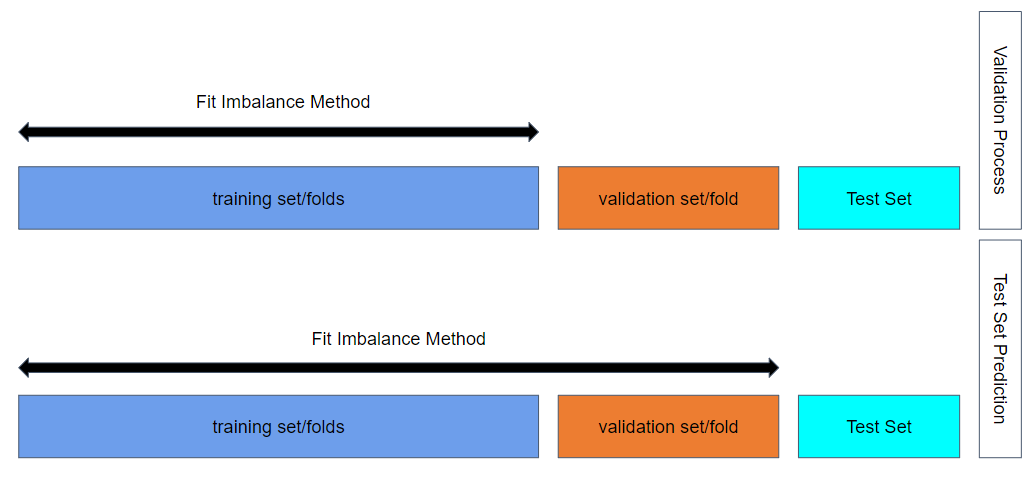

__SMOTE__

In [48]:
#1. Melakukan resampling dan modeling dalam pipeline

smote = SMOTE()
logit = LogisticRegression()

estimator = Pipeline([('balancing', smote), ('clf', logit)])

In [49]:
#2. Melakukan cross validation

skf = StratifiedKFold(n_splits = 5)
model_cv = cross_val_score(estimator, X_train_val, y_train_val, cv = skf, scoring = 'f1')

In [50]:
#3. Menampilkan nilai cv score dan cv score mean

print('cv score:', model_cv)
print('cv score mean:', model_cv.mean())

cv score: [0.525      0.58666667 0.63636364 0.75       0.55555556]
cv score mean: 0.6107171717171717


__PENALIZED__

In [51]:
#1. Melakukan modelling dengan balanced

logit_balance = LogisticRegression(class_weight='balanced') #gak perlu pake pipeline

In [ ]:
#2. Melakukan cross validation

model_cv_balance = cross_val_score(logit_balance, X_train_val, y_train_val, cv=skf, scoring='f1')

In [52]:
#3. Menampilkan nilai cv score dan cv score mean

print('cv score:', model_cv_balance)
print('cv score mean:', model_cv_balance.mean())

cv score: [0.56097561 0.60273973 0.60869565 0.76190476 0.52173913]
cv score mean: 0.6112109760593905


# __Combine Hyperparameter Tuning with Balancing Method__

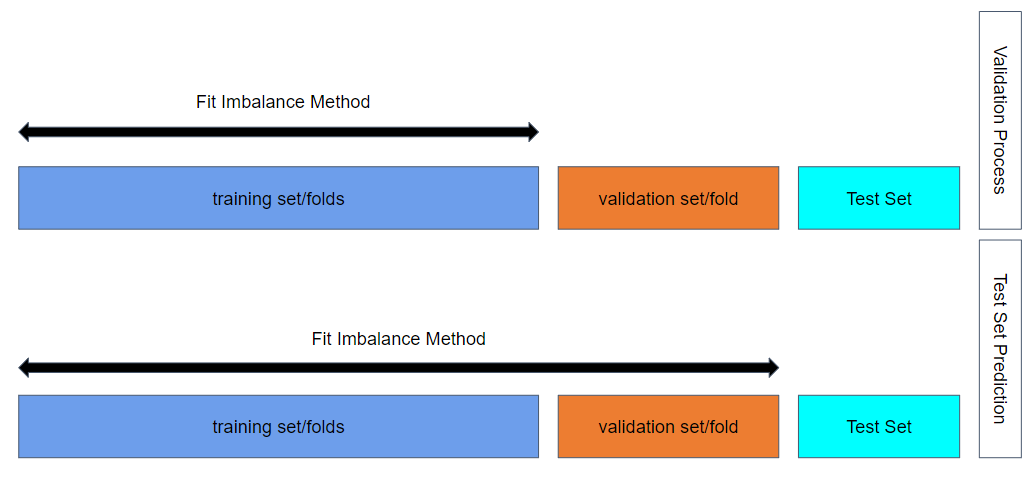

In [53]:
smote = SMOTE() #resampling
model = LogisticRegression() #model
estimator = Pipeline([('balancing', smote), ('clf', model)]) #pipeline estimator

#parameter
hyperparam_space = {
    'balancing__k_neighbors': [2,5,10,15,20], 
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001], 
    'clf__solver':['liblinear', 'newton-cg']
}

#cross validation
skf = StratifiedKFold(n_splits=5)

#hyperparameter tunning
grid_search = GridSearchCV(estimator,
                           param_grid = hyperparam_space,
                          cv = skf,
                          scoring = 'f1',
                          n_jobs = -1
                          )

In [55]:
#Hyperparameter tunning

grid_search.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('balancing', SMOTE()),
                                       ('clf', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'balancing__k_neighbors': [2, 5, 10, 15, 20],
                         'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
                         'clf__solver': ['liblinear', 'newton-cg']},
             scoring='f1')

In [56]:
#Menampilkan best score dan best parameter

print('best score:', grid_search.best_score_)
print('best param:', grid_search.best_params_)

best score: 0.6234057971014493
best param: {'balancing__k_neighbors': 2, 'clf__C': 0.01, 'clf__solver': 'liblinear'}


In [57]:
#Menampilkan hasil gridsearch dalam dataframe

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.028983,0.003160,0.007795,0.003655,2,100,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.550000,0.583333,0.666667,0.750000,0.521739,0.614348,0.083448,16
1,0.048773,0.010529,0.006196,0.001470,2,100,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.554217,0.594595,0.617647,0.761905,0.542857,0.614244,0.078614,17
2,0.023585,0.002575,0.006396,0.000799,2,10,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.602740,0.636364,0.741935,0.555556,0.614636,0.072665,14
3,0.048173,0.006239,0.006395,0.000799,2,10,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.543210,0.613333,0.608696,0.750000,0.529412,0.608930,0.078182,32
4,0.026186,0.005415,0.007995,0.003031,2,1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.525000,0.602740,0.617647,0.761905,0.521739,0.605806,0.087308,47
5,0.044774,0.003121,0.008194,0.002638,2,1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.536585,0.586667,0.626866,0.750000,0.535211,0.607066,0.079207,39
6,0.024586,0.004361,0.009794,0.006206,2,0.1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.554217,0.594595,0.636364,0.727273,0.535211,0.609532,0.068395,27
7,0.041987,0.003101,0.006386,0.001029,2,0.1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.518519,0.602740,0.608696,0.750000,0.521739,0.600339,0.084079,55
8,0.023187,0.003812,0.005796,0.000401,2,0.01,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.564706,0.625000,0.608696,0.735294,0.583333,0.623406,0.059648,1
9,0.042772,0.006143,0.006795,0.001720,2,0.01,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.550000,0.594595,0.617647,0.757576,0.563380,0.616640,0.074334,8


> ### __Model Performance Before Tuning__

In [58]:
smote = SMOTE()
logit = LogisticRegression()

estimator = Pipeline([('balancing', smote), ('clf', model)])

estimator.fit(X_train_val, y_train_val)
y_pred_default = estimator.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       103
           1       0.53      0.81      0.64        37

    accuracy                           0.76       140
   macro avg       0.72      0.77      0.73       140
weighted avg       0.81      0.76      0.77       140



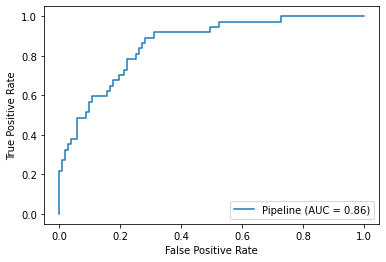

In [62]:
plot_roc_curve(estimator, X_test, y_test)

> ### __Model Performance After Tuning__

In [59]:
estimator_tuned = grid_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tuned = estimator_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

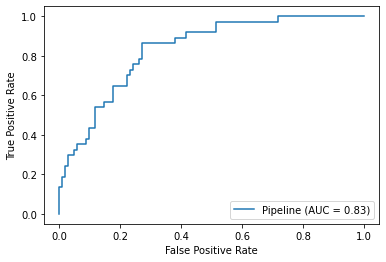

In [61]:
plot_roc_curve(estimator_tuned, X_test, y_test)